## Stock Return Prediction using Fundamental Data Part I

### Introduction

- This projects seeks to uncover key fundamental ratios and variables that significantly drive stock returns for the  medium and long term. Stocks information for actively traded stocks from NYSE and NASDAQ were used.
- Please note this is not a trading strategy.
- Datsets were downloaded in piecemeal, four different datasets (fundamental stock data ) were downloaded from [SimFin](https://simfin.com/) whereas return data were scraped from [YahooFinance](https://finance.yahoo.com/)

** Part II of this project utilizes a couple of classical techniques to solve the problem of imbalanced datasets**
- A link to Part II is provided at the end of the notebook.

**Attribute Information Description**

The dependent variable is a categorical variable with good stocks, that is, stocks that outperform the benchmark assigned 0, whereas bad stocks which are all other stocks are assigned 1. A total of 63 attributes were used which are metrics from the income statement, balance sheet, and cash flow statement. A description of the attrbutes is provided below.


- Basic/Trailing Twelve Months(TTM) Income Statement, Balance Sheet and Cash Flow Metrics:

'Net Margin (TTM)', 'Operating Margin (TTM)', 'ROE (TTM)'- Return on Equity, 'ROA (TTM)' - Return on Assets,'FCF/Net inc. (TTM)' - Free Cah Flow, 'Current ratio (TTM)', 'Liab./Equ. (TTM)', 'Debt/Assets (TTM)', 'basic EPS (TTM, USD) - Earnings Per Share', 'dil. EPS (TTM, USD)', 'Sales/Sh. (TTM, USD)' - Sales Per Share, 'Book/Sh. (TTM, USD)', 'FCF/Sh. (TTM, USD)','Div./Sh. (TTM, USD)', 'P/E (TTM)' - Price to Earnigs, 'P/S (TTM)' - Price to Sales, 'P/B (TTM)' - Price to Book, 'P/FCF (TTM)', 'MCAP (in million, USD)' - Market Capitalization, 'EV (in million, USD)' - Enterprise Value, 'EV/EBITDA (TTM)' - Enterprise Value to Earnings Before Interest, Tax, Depreciation and Amortization, 'EV/Sales (TTM)', 'EV/FCF (TTM)', 'Book/MCAP', 'EBIT/EV (TTM)', 'P. F-Score (TTM)'] - Piotroski F-Score.

- Trailing Twelve Months (TTM) metrics (%Change):

'Revenues (%chg., TTM, 1y)', 'COGS (%chg., TTM, 1y)','Gross Profit (%chg., TTM, 1y)','Op. Exp. (%chg., TTM, 1y)', 'SG&A (%chg., TTM, 1y)', 'R&D (%chg., TTM, 1y)','EBIT (%chg., TTM, 1y)', 'EBITDA (%chg., TTM, 1y)','Interest, net (%chg., TTM, 1y)', 'Pretax Inc. (adj) (%chg., TTM, 1y)' - Pretax Income Adjusted,'Pretax Inc. (%chg., TTM, 1y)', 'Taxes (%chg., TTM, 1y)', 'Income cont. op. (%chg., TTM, 1y)' - Income from Continuing Operations, 'Net income (%chg., TTM, 1y)','Cash and eq. (%chg., TTM, 1y)' - Cash and Equivalents, 'Receivables (%chg., TTM, 1y)','Cur. assets (%chg., TTM, 1y)', 'PPE (%chg., TTM, 1y)' - Property, Plant and Equipment,'Assets (%chg., TTM, 1y)', 'Acc. payable (%chg., TTM, 1y)' - Accounts Payable, 'ST debt (%chg., TTM, 1y)' - Short-term Debt, 'Cur. liab. (%chg., TTM, 1y)','LT debt (%chg., TTM, 1y)', 'Debt (%chg., TTM, 1y)','Liabilities (%chg., TTM, 1y)', 'Pref. Equity (%chg., TTM, 1y)' - Preference Equity, 'Common Stock (%chg., TTM, 1y)', 'Eq. excl. min. (%chg., TTM, 1y)' - Equity excluding Minority Interest,'Minorities (%chg., TTM, 1y)', 'Equity (%chg., TTM, 1y)', 'D&A (%chg., TTM, 1y)' - Depreciation and Amortization, 'Chg. WC (%chg., TTM, 1y)' - Change in Working Capital,'Op. CF (%chg., TTM, 1y)' - Operating Cash Flows, 'Chg. in PP&E (%chg., TTM, 1y)', 'Inv. CF (%chg., TTM, 1y)' - CashFlows from Investing Activities,'Dividends (%chg., TTM, 1y)', 'Fin. CF (%chg., TTM, 1y)' - CashFlows from Financing Activities, 'Cash chg. (%chg., TTM, 1y)', 'FCF (%chg., TTM, 1y)' - Free CashFlows. 

## Using An Imbalanced Dataset

## Data Preprocessing Part A

### Importing the Libraries

In [9]:
import numpy as np
import pandas as pd
import pandasql as ps
from pandasql import sqldf
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [10]:
data3 = pd.read_excel('SimFin-data3.xlsx', skiprows=3)
data2 = pd.read_excel('SimFin-data2.xlsx', skiprows=3)
data1 = pd.read_excel('SimFin-data1.xlsx', skiprows=3)
data = pd.read_excel('SimFin-data.xlsx', skiprows=3)

In [11]:
data3.head()

,Unnamed: 0,Unnamed: 1,Net Margin (TTM),Operating Margin (TTM),ROE (TTM),ROA (TTM),FCF/Net inc. (TTM),Current ratio (TTM),Liab./Equ. (TTM),Debt/Assets (TTM),...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,NaN,"Red Giant Entertainment, Inc.",331.5819,47.8588,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"BRK, Inc.",131.2954,-241.4679,-0.6633,80.3244,NaN,0.0082,-1.0083,54.7184,...,-4.20,NaN,4.823608,5.253946,NaN,1072.02,NaN,-0.20,-0.2252,NaN
2,NaN,"GI DYNAMICS, INC.",68.8000,64.4000,2.1191,-2.3745,0.9284,0.4673,-1.8925,1.4613,...,-0.06,-0.03,0.246662,2.283662,-0.30,-19.03,-0.30,-12.70,-3.3840,2.0
3,NaN,"Advanced Emissions Solutions, Inc.",4.7649,-1.8799,0.4452,0.4262,-1.0949,12.1173,0.0446,0.0000,...,2.74,-5.62,239.940252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Biostar Pharmaceuticals, Inc.",2.9401,-16.6802,0.0258,0.0226,1.2778,0.1888,0.1461,0.0586,...,0.09,2.63,3.164626,5.226751,-1.25,16.45,4.38,11.42,-1.0142,4.0


In [12]:
data3a = data3.drop(data3.columns[[0,1]],axis=1) #Dropping columns not needed (duplication)

In [13]:
data3a.head()

,Net Margin (TTM),Operating Margin (TTM),ROE (TTM),ROA (TTM),FCF/Net inc. (TTM),Current ratio (TTM),Liab./Equ. (TTM),Debt/Assets (TTM),"basic EPS (TTM, USD)",Ticker,...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,331.5819,47.8588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REDG,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131.2954,-241.4679,-0.6633,80.3244,NaN,0.0082,-1.0083,54.7184,0.01,BRK,...,-4.20,NaN,4.823608,5.253946,NaN,1072.02,NaN,-0.20,-0.2252,NaN
2,68.8000,64.4000,2.1191,-2.3745,0.9284,0.4673,-1.8925,1.4613,-0.69,GIDYL,...,-0.06,-0.03,0.246662,2.283662,-0.30,-19.03,-0.30,-12.70,-3.3840,2.0
3,4.7649,-1.8799,0.4452,0.4262,-1.0949,12.1173,0.0446,0.0000,1.75,ADES,...,2.74,-5.62,239.940252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.9401,-16.6802,0.0258,0.0226,1.2778,0.1888,0.1461,0.0586,0.36,BSPM,...,0.09,2.63,3.164626,5.226751,-1.25,16.45,4.38,11.42,-1.0142,4.0


In [14]:
data2.head()

,Unnamed: 0,Unnamed: 1,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)","Interest, net (%chg., TTM, 1y)","Pretax Inc. (adj) (%chg., TTM, 1y)","Pretax Inc. (%chg., TTM, 1y)","Taxes (%chg., TTM, 1y)","Income cont. op. (%chg., TTM, 1y)","Net income (%chg., TTM, 1y)","Cash and eq. (%chg., TTM, 1y)","Receivables (%chg., TTM, 1y)","Cur. assets (%chg., TTM, 1y)"
0,NaN,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,-0.3353,-0.4219,-0.4219,-1.1511,-0.2113,-0.2113,1.9561,-0.1393,0.1100
1,NaN,1ST SOURCE CORP,SRCE,0.1083,NaN,NaN,NaN,NaN,NaN,-0.0008,-0.0039,NaN,-0.0008,-0.0008,-0.3847,0.2096,0.2096,0.0576,NaN,NaN
2,NaN,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,NaN,-0.0141,-0.0073,0.0025,-0.0566,-0.0312,-1.4288,0.5939,0.6390,0.0264,NaN,0.1253
3,NaN,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,9.1778,-0.0058,-0.0058,0.2559,0.0236,0.0133,-0.3343,0.0382,-0.0217
4,NaN,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,2.9634,-0.0812,-0.0713,0.2150,-0.1747,-0.1758,0.0310,0.0336,0.0559


In [15]:
data2a = data2.drop(data2.columns[[0]],axis=1)

In [16]:
data2a.head()

,Unnamed: 1,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)","Interest, net (%chg., TTM, 1y)","Pretax Inc. (adj) (%chg., TTM, 1y)","Pretax Inc. (%chg., TTM, 1y)","Taxes (%chg., TTM, 1y)","Income cont. op. (%chg., TTM, 1y)","Net income (%chg., TTM, 1y)","Cash and eq. (%chg., TTM, 1y)","Receivables (%chg., TTM, 1y)","Cur. assets (%chg., TTM, 1y)"
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,-0.3353,-0.4219,-0.4219,-1.1511,-0.2113,-0.2113,1.9561,-0.1393,0.1100
1,1ST SOURCE CORP,SRCE,0.1083,NaN,NaN,NaN,NaN,NaN,-0.0008,-0.0039,NaN,-0.0008,-0.0008,-0.3847,0.2096,0.2096,0.0576,NaN,NaN
2,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,NaN,-0.0141,-0.0073,0.0025,-0.0566,-0.0312,-1.4288,0.5939,0.6390,0.0264,NaN,0.1253
3,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,9.1778,-0.0058,-0.0058,0.2559,0.0236,0.0133,-0.3343,0.0382,-0.0217
4,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,2.9634,-0.0812,-0.0713,0.2150,-0.1747,-0.1758,0.0310,0.0336,0.0559


In [17]:
data1.head()

,Unnamed: 0,Unnamed: 1,Ticker,"PPE (%chg., TTM, 1y)","Assets (%chg., TTM, 1y)","Acc. payable (%chg., TTM, 1y)","ST debt (%chg., TTM, 1y)","Cur. liab. (%chg., TTM, 1y)","LT debt (%chg., TTM, 1y)","Debt (%chg., TTM, 1y)","Liabilities (%chg., TTM, 1y)","Pref. Equity (%chg., TTM, 1y)","Common Stock (%chg., TTM, 1y)","Eq. excl. min. (%chg., TTM, 1y)","Minorities (%chg., TTM, 1y)","Equity (%chg., TTM, 1y)","D&A (%chg., TTM, 1y)","Chg. WC (%chg., TTM, 1y)","Op. CF (%chg., TTM, 1y)",Price (USD)
0,NaN,AGILENT TECHNOLOGIES INC,A,0.1187,0.0107,-0.0554,-1.0000,-0.1829,-0.0011,-0.1355,0.0359,NaN,0.0,-0.0095,0.3333,-0.0093,-0.0463,-0.3216,0.2012,62.67
1,NaN,Alcoa Corp,AA,-0.0999,-0.0620,0.0575,-0.7647,0.0860,0.3150,0.3019,-0.0258,NaN,0.0,-0.1102,-0.0829,-0.1026,0.0013,1.3402,-0.6349,25.15
2,NaN,American Airlines Group Inc.,AAL,NaN,NaN,NaN,NaN,NaN,NaN,-1.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.1095,-2.6142,-0.3431,29.72
3,NaN,Altisource Residential Corp,AAMC,0.4154,0.2465,NaN,0.5425,0.5331,NaN,0.5425,0.5331,NaN,NaN,-0.2374,NaN,-0.2374,NaN,NaN,NaN,33.00
4,NaN,ATLANTIC AMERICAN CORP,AAME,NaN,0.0157,NaN,NaN,NaN,NaN,NaN,0.0579,0.0,NaN,-0.0703,NaN,-0.0703,-0.2825,0.5428,-1.5584,2.37


In [18]:
data1a = data1.drop(data1.columns[[0,1]],axis=1)

In [19]:
data1a.head()

,Ticker,"PPE (%chg., TTM, 1y)","Assets (%chg., TTM, 1y)","Acc. payable (%chg., TTM, 1y)","ST debt (%chg., TTM, 1y)","Cur. liab. (%chg., TTM, 1y)","LT debt (%chg., TTM, 1y)","Debt (%chg., TTM, 1y)","Liabilities (%chg., TTM, 1y)","Pref. Equity (%chg., TTM, 1y)","Common Stock (%chg., TTM, 1y)","Eq. excl. min. (%chg., TTM, 1y)","Minorities (%chg., TTM, 1y)","Equity (%chg., TTM, 1y)","D&A (%chg., TTM, 1y)","Chg. WC (%chg., TTM, 1y)","Op. CF (%chg., TTM, 1y)",Price (USD)
0,A,0.1187,0.0107,-0.0554,-1.0000,-0.1829,-0.0011,-0.1355,0.0359,NaN,0.0,-0.0095,0.3333,-0.0093,-0.0463,-0.3216,0.2012,62.67
1,AA,-0.0999,-0.0620,0.0575,-0.7647,0.0860,0.3150,0.3019,-0.0258,NaN,0.0,-0.1102,-0.0829,-0.1026,0.0013,1.3402,-0.6349,25.15
2,AAL,NaN,NaN,NaN,NaN,NaN,NaN,-1.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.1095,-2.6142,-0.3431,29.72
3,AAMC,0.4154,0.2465,NaN,0.5425,0.5331,NaN,0.5425,0.5331,NaN,NaN,-0.2374,NaN,-0.2374,NaN,NaN,NaN,33.00
4,AAME,NaN,0.0157,NaN,NaN,NaN,NaN,NaN,0.0579,0.0,NaN,-0.0703,NaN,-0.0703,-0.2825,0.5428,-1.5584,2.37


In [20]:
data.head()

,Unnamed: 0,Unnamed: 1,Ticker,"Chg. in PP&E (%chg., TTM, 1y)","Inv. CF (%chg., TTM, 1y)","Dividends (%chg., TTM, 1y)","Fin. CF (%chg., TTM, 1y)","Cash chg. (%chg., TTM, 1y)","FCF (%chg., TTM, 1y)"
0,NaN,1 800 FLOWERS COM INC,FLWS,0.0362,-1.4850,NaN,-0.8647,6.4987,0.0814
1,NaN,1ST SOURCE CORP,SRCE,-1.9157,0.3018,0.2232,0.5474,3.0144,0.1875
2,NaN,21st Century Fox,FOX,0.4074,2.7432,0.0669,1.2244,-0.9180,0.3107
3,NaN,3D SYSTEMS CORP,DDD,0.4929,-0.4225,NaN,0.0485,0.1162,0.8056
4,NaN,3M,MMM,0.0302,2.5856,0.1217,-0.3679,-0.3231,0.0124


In [21]:
dataa = data.drop(data.columns[[0,1]],axis=1)

In [22]:
dataa.head()

,Ticker,"Chg. in PP&E (%chg., TTM, 1y)","Inv. CF (%chg., TTM, 1y)","Dividends (%chg., TTM, 1y)","Fin. CF (%chg., TTM, 1y)","Cash chg. (%chg., TTM, 1y)","FCF (%chg., TTM, 1y)"
0,FLWS,0.0362,-1.4850,NaN,-0.8647,6.4987,0.0814
1,SRCE,-1.9157,0.3018,0.2232,0.5474,3.0144,0.1875
2,FOX,0.4074,2.7432,0.0669,1.2244,-0.9180,0.3107
3,DDD,0.4929,-0.4225,NaN,0.0485,0.1162,0.8056
4,MMM,0.0302,2.5856,0.1217,-0.3679,-0.3231,0.0124


In [23]:
data3a.shape, data2a.shape, data1a.shape, dataa.shape

((2134, 27), (2134, 19), (2136, 18), (2134, 7))

In [24]:
data1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 18 columns):
Ticker                             2132 non-null object
PPE (%chg., TTM, 1y)               1816 non-null float64
Assets (%chg., TTM, 1y)            1968 non-null float64
Acc. payable (%chg., TTM, 1y)      1702 non-null float64
ST debt (%chg., TTM, 1y)           1252 non-null float64
Cur. liab. (%chg., TTM, 1y)        1857 non-null float64
LT debt (%chg., TTM, 1y)           1500 non-null float64
Debt (%chg., TTM, 1y)              1615 non-null float64
Liabilities (%chg., TTM, 1y)       1970 non-null float64
Pref. Equity (%chg., TTM, 1y)      178 non-null float64
Common Stock (%chg., TTM, 1y)      239 non-null float64
Eq. excl. min. (%chg., TTM, 1y)    1952 non-null float64
Minorities (%chg., TTM, 1y)        677 non-null float64
Equity (%chg., TTM, 1y)            1970 non-null float64
D&A (%chg., TTM, 1y)               1764 non-null float64
Chg. WC (%chg., TTM, 1y)           1808 no

In [25]:
#Combining all four datasets
combdata = reduce(lambda x,y: pd.merge(x,y, on='Ticker', how='outer'), [data2a,data1a,dataa, data3a])

In [26]:
combdata.shape

(2514, 68)

In [27]:
combdata.head()

,Unnamed: 1,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5.0
1,1ST SOURCE CORP,SRCE,0.1083,NaN,NaN,NaN,NaN,NaN,-0.0008,-0.0039,...,1.59,-48.23,NaN,1542.297797,14.35,5.05,-62.53,0.63,0.0655,NaN
2,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,NaN,-0.0141,-0.0073,...,4.14,17.87,84236.546737,104151.607755,14.77,3.41,20.51,0.24,0.0620,6.0
3,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,NaN
4,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,11.22,22.51,123317.884925,125106.677466,15.41,3.81,24.34,0.09,0.0532,4.0


In [28]:
combdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514 entries, 0 to 2513
Data columns (total 68 columns):
Unnamed: 1                            2513 non-null object
Ticker                                2482 non-null object
Revenues (%chg., TTM, 1y)             2067 non-null float64
COGS (%chg., TTM, 1y)                 1835 non-null float64
Gross Profit (%chg., TTM, 1y)         1954 non-null float64
Op. Exp. (%chg., TTM, 1y)             2013 non-null float64
SG&A (%chg., TTM, 1y)                 1906 non-null float64
R&D (%chg., TTM, 1y)                  846 non-null float64
EBIT (%chg., TTM, 1y)                 2131 non-null float64
EBITDA (%chg., TTM, 1y)               1968 non-null float64
Interest, net (%chg., TTM, 1y)        1796 non-null float64
Pretax Inc. (adj) (%chg., TTM, 1y)    2131 non-null float64
Pretax Inc. (%chg., TTM, 1y)          2131 non-null float64
Taxes (%chg., TTM, 1y)                1960 non-null float64
Income cont. op. (%chg., TTM, 1y)     2131 non-null floa

In [29]:
#Checking for null values
combdata.isna().values.any()

True

In [199]:
combdata.columns

Index(['Name', 'Ticker', 'Revenues (%chg., TTM, 1y)', 'COGS (%chg., TTM, 1y)',
       'Gross Profit (%chg., TTM, 1y)', 'Op. Exp. (%chg., TTM, 1y)',
       'SG&A (%chg., TTM, 1y)', 'R&D (%chg., TTM, 1y)',
       'EBIT (%chg., TTM, 1y)', 'EBITDA (%chg., TTM, 1y)',
       'Interest, net (%chg., TTM, 1y)', 'Pretax Inc. (adj) (%chg., TTM, 1y)',
       'Pretax Inc. (%chg., TTM, 1y)', 'Taxes (%chg., TTM, 1y)',
       'Income cont. op. (%chg., TTM, 1y)', 'Net income (%chg., TTM, 1y)',
       'Cash and eq. (%chg., TTM, 1y)', 'Receivables (%chg., TTM, 1y)',
       'Cur. assets (%chg., TTM, 1y)', 'PPE (%chg., TTM, 1y)',
       'Assets (%chg., TTM, 1y)', 'Acc. payable (%chg., TTM, 1y)',
       'ST debt (%chg., TTM, 1y)', 'Cur. liab. (%chg., TTM, 1y)',
       'LT debt (%chg., TTM, 1y)', 'Debt (%chg., TTM, 1y)',
       'Liabilities (%chg., TTM, 1y)', 'Pref. Equity (%chg., TTM, 1y)',
       'Common Stock (%chg., TTM, 1y)', 'Eq. excl. min. (%chg., TTM, 1y)',
       'Minorities (%chg., TTM, 1y)', 'Equi

In [30]:
combdata.describe()

,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)","Interest, net (%chg., TTM, 1y)","Pretax Inc. (adj) (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
count,2067.000000,1835.000000,1954.000000,2013.000000,1906.000000,846.000000,2131.000000,1968.000000,1796.000000,2131.00000,...,2113.000000,1834.000000,2.223000e+03,2.163000e+03,1836.000000,1921.000000,1836.000000,2.163000e+03,1921.000000,1520.000000
mean,0.524691,0.140997,0.452479,0.241994,34.402351,0.199723,0.355575,0.578106,0.965356,-0.08889,...,-4.075092,5.669128,2.307923e+04,2.675814e+04,-101.909003,15.867616,8.120387,5.842576e+03,0.063799,5.017105
std,11.601300,0.741525,9.850886,9.594514,1488.554885,1.757616,9.860011,20.047080,19.336017,17.34752,...,440.799879,978.950764,8.308036e+04,8.347284e+04,5275.279984,296.693605,1196.374012,2.694509e+05,5.512343,1.833338
min,-6.366800,-4.223200,-10.366600,-141.542100,-30.987100,-2.842100,-66.567100,-114.173900,-183.365100,-741.60000,...,-12901.460000,-24243.180000,0.000000e+00,-2.624200e+04,-224333.560000,-19.030000,-23461.190000,-3.722923e+04,-114.870500,0.000000
25%,0.014950,0.007950,0.003825,-0.003000,-0.006475,-0.024100,-0.208700,-0.104025,-0.080125,-0.24370,...,1.140000,-0.270000,5.434159e+02,5.703333e+02,5.717500,0.950000,-0.055000,1.600000e-01,0.012700,4.000000
50%,0.076900,0.077100,0.077950,0.072600,0.076150,0.097950,0.043500,0.068600,0.058300,0.03880,...,2.120000,11.015000,3.770800e+03,4.819276e+03,11.135000,2.280000,13.740000,3.700000e-01,0.047700,5.000000
75%,0.180450,0.178650,0.203100,0.182700,0.179025,0.236175,0.245700,0.243100,0.301325,0.28415,...,4.310000,24.280000,1.493937e+04,1.734758e+04,16.430000,4.730000,28.765000,7.100000e-01,0.073900,6.000000
max,428.452400,17.550500,428.452400,406.170700,64986.000000,48.274400,358.170600,868.958900,567.000000,149.71010,...,14317.190000,25587.210000,1.083304e+06,1.004807e+06,21358.020000,12336.000000,41289.940000,1.253150e+07,208.192400,9.000000


In [31]:
combdata.head()

,Unnamed: 1,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5.0
1,1ST SOURCE CORP,SRCE,0.1083,NaN,NaN,NaN,NaN,NaN,-0.0008,-0.0039,...,1.59,-48.23,NaN,1542.297797,14.35,5.05,-62.53,0.63,0.0655,NaN
2,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,NaN,-0.0141,-0.0073,...,4.14,17.87,84236.546737,104151.607755,14.77,3.41,20.51,0.24,0.0620,6.0
3,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,NaN
4,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,11.22,22.51,123317.884925,125106.677466,15.41,3.81,24.34,0.09,0.0532,4.0


In [32]:
# renaming the first column
combdata = combdata.rename(columns={combdata.columns[0]: "Name"})

In [33]:
combdata.head()

,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5.0
1,1ST SOURCE CORP,SRCE,0.1083,NaN,NaN,NaN,NaN,NaN,-0.0008,-0.0039,...,1.59,-48.23,NaN,1542.297797,14.35,5.05,-62.53,0.63,0.0655,NaN
2,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,NaN,-0.0141,-0.0073,...,4.14,17.87,84236.546737,104151.607755,14.77,3.41,20.51,0.24,0.0620,6.0
3,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,NaN
4,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,11.22,22.51,123317.884925,125106.677466,15.41,3.81,24.34,0.09,0.0532,4.0


In [34]:
# locating the Price column to drop later
combdata.columns.get_loc("Price (USD)")

35

In [35]:
#combdata.head(n=1500)

In [36]:
#combdata.isnull().sum()

In [37]:
# drop rows with Null values for Revenue, COGS and Op.Exp
combdata1 = combdata.dropna(subset=["Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)", \
                                    "Op. Exp. (%chg., TTM, 1y)"])

In [38]:
combdata.shape, combdata1.shape

((2514, 68), (1830, 68))

In [39]:
#combdata1.head(n=1500)

In [40]:
# drop rows with null values for EV/EBITDA
combdata2 = combdata1.dropna(subset=["EV/EBITDA (TTM)"])

In [41]:
combdata2.shape

(1565, 68)

In [42]:
combdata2.head()

,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5.0
2,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,NaN,-0.0141,-0.0073,...,4.14,17.87,84236.546737,104151.607755,14.77,3.41,20.51,0.24,0.0620,6.0
3,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,NaN
4,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,11.22,22.51,123317.884925,125106.677466,15.41,3.81,24.34,0.09,0.0532,4.0
6,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,12.4883,...,6.76,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1.0


In [43]:
combdata2.isnull().sum(axis=0)

Name                                     0
Ticker                                  16
Revenues (%chg., TTM, 1y)                0
COGS (%chg., TTM, 1y)                    0
Gross Profit (%chg., TTM, 1y)            0
Op. Exp. (%chg., TTM, 1y)                0
SG&A (%chg., TTM, 1y)                   61
R&D (%chg., TTM, 1y)                   885
EBIT (%chg., TTM, 1y)                    0
EBITDA (%chg., TTM, 1y)                 17
Interest, net (%chg., TTM, 1y)         171
Pretax Inc. (adj) (%chg., TTM, 1y)       0
Pretax Inc. (%chg., TTM, 1y)             0
Taxes (%chg., TTM, 1y)                  62
Income cont. op. (%chg., TTM, 1y)        0
Net income (%chg., TTM, 1y)              0
Cash and eq. (%chg., TTM, 1y)            7
Receivables (%chg., TTM, 1y)           224
Cur. assets (%chg., TTM, 1y)             3
PPE (%chg., TTM, 1y)                    22
Assets (%chg., TTM, 1y)                 11
Acc. payable (%chg., TTM, 1y)           94
ST debt (%chg., TTM, 1y)               494
Cur. liab. 

In [44]:
#Change in common and preference shares are mostly NaN because firms do not issue shares every yearly, so remove the columns.
#Also remove rows with no ticker symbols

In [45]:
combdata2a = combdata2.dropna(subset=["Ticker"]) # Drop columns with no ticker symbols

In [46]:
#combdata2a.isnull().sum()

In [47]:
combdata2a.columns.get_loc("Pref. Equity (%chg., TTM, 1y)")

27

In [48]:
combdata2.columns.get_loc("Common Stock (%chg., TTM, 1y)")

28

In [49]:
# Drop the price column to be replaced later with annual price return as the dependent variable
combdata2.columns.get_loc("Price (USD)")

35

In [50]:
combdata3 = combdata2a.drop(combdata2.columns[[27,28, 35]], axis=1)

In [51]:
combdata2a.shape, combdata3.shape

((1549, 68), (1549, 65))

In [52]:
combdata3.isnull().sum()

Name                                    0
Ticker                                  0
Revenues (%chg., TTM, 1y)               0
COGS (%chg., TTM, 1y)                   0
Gross Profit (%chg., TTM, 1y)           0
Op. Exp. (%chg., TTM, 1y)               0
SG&A (%chg., TTM, 1y)                  61
R&D (%chg., TTM, 1y)                  869
EBIT (%chg., TTM, 1y)                   0
EBITDA (%chg., TTM, 1y)                17
Interest, net (%chg., TTM, 1y)        171
Pretax Inc. (adj) (%chg., TTM, 1y)      0
Pretax Inc. (%chg., TTM, 1y)            0
Taxes (%chg., TTM, 1y)                 62
Income cont. op. (%chg., TTM, 1y)       0
Net income (%chg., TTM, 1y)             0
Cash and eq. (%chg., TTM, 1y)           7
Receivables (%chg., TTM, 1y)          216
Cur. assets (%chg., TTM, 1y)            3
PPE (%chg., TTM, 1y)                   18
Assets (%chg., TTM, 1y)                 7
Acc. payable (%chg., TTM, 1y)          90
ST debt (%chg., TTM, 1y)              486
Cur. liab. (%chg., TTM, 1y)       

In [53]:
# Most columns have NAs because:
# 1. S&G and R&D are not required expenses, some companies do not use debt, do not pay dividens etc
# so fill NAS with zero values

In [54]:
combdata4 = combdata3.fillna(0)

In [55]:
combdata4.isna().values.any()

False

In [56]:
combdata4.describe()

,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)","Interest, net (%chg., TTM, 1y)","Pretax Inc. (adj) (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.00000,1549.000000,1549.000000,1549.000000,1549.000000,...,1549.000000,1549.000000,1.549000e+03,1.549000e+03,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,0.145249,0.149560,0.197391,0.281619,0.352294,0.05979,0.273265,0.774798,0.547226,-0.275788,...,-7.503066,14.114571,2.639873e+04,2.779442e+04,-114.002460,5.744584,23.736566,77.687540,-0.044865,4.298257
std,0.964211,0.752195,1.434013,10.932710,10.352233,0.39473,7.066522,22.372267,11.987357,19.929646,...,341.998729,936.448020,9.689593e+04,8.769049e+04,5740.374937,73.368045,1229.543254,1704.290196,2.965406,2.522791
min,-6.366800,-4.223200,-6.694900,-141.542100,-30.987100,-1.38430,-66.567100,-25.132700,-137.410700,-741.600000,...,-12901.460000,-24243.180000,0.000000e+00,-1.149803e+02,-224333.560000,-19.030000,-23461.190000,-37229.230000,-114.870500,0.000000
25%,0.023300,0.019500,0.006700,0.003200,0.000000,0.00000,-0.205600,-0.103000,-0.057100,-0.257200,...,1.080000,0.000000,6.222241e+02,9.343227e+02,6.130000,0.950000,2.970000,0.150000,0.013900,3.000000
50%,0.081200,0.078100,0.079800,0.077100,0.075000,0.00000,0.045100,0.063400,0.028700,0.025500,...,2.390000,11.300000,3.887485e+03,5.468250e+03,11.210000,2.150000,15.010000,0.340000,0.047600,5.000000
75%,0.182800,0.178100,0.193100,0.176900,0.169200,0.06170,0.234400,0.222900,0.232600,0.257200,...,4.550000,24.430000,1.369862e+04,1.681746e+04,16.620000,4.240000,30.290000,0.630000,0.072700,6.000000
max,32.161100,17.550500,37.060200,406.170700,406.170700,8.70870,232.474600,868.958900,374.227300,149.710100,...,927.260000,25587.210000,1.083304e+06,1.004807e+06,21358.020000,2847.110000,41289.940000,19745.600000,13.556600,9.000000


In [57]:
#Note that percentage change in Revenues, COGS, Gross Profit, etc can be negative, so are EBIT, EBITDA, Book value of equities
# (if liabilities exceed assets)

In [58]:
combdata4.head()

,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5.0
2,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,-0.0073,...,4.14,17.87,84236.546737,104151.607755,14.77,3.41,20.51,0.24,0.0620,6.0
3,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0.0
4,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,11.22,22.51,123317.884925,125106.677466,15.41,3.81,24.34,0.09,0.0532,4.0
6,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,12.4883,...,6.76,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1.0


In [59]:
combdata4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2512
Data columns (total 65 columns):
Name                                  1549 non-null object
Ticker                                1549 non-null object
Revenues (%chg., TTM, 1y)             1549 non-null float64
COGS (%chg., TTM, 1y)                 1549 non-null float64
Gross Profit (%chg., TTM, 1y)         1549 non-null float64
Op. Exp. (%chg., TTM, 1y)             1549 non-null float64
SG&A (%chg., TTM, 1y)                 1549 non-null float64
R&D (%chg., TTM, 1y)                  1549 non-null float64
EBIT (%chg., TTM, 1y)                 1549 non-null float64
EBITDA (%chg., TTM, 1y)               1549 non-null float64
Interest, net (%chg., TTM, 1y)        1549 non-null float64
Pretax Inc. (adj) (%chg., TTM, 1y)    1549 non-null float64
Pretax Inc. (%chg., TTM, 1y)          1549 non-null float64
Taxes (%chg., TTM, 1y)                1549 non-null float64
Income cont. op. (%chg., TTM, 1y)     1549 non-null flo

In [60]:
combdata5 = combdata4.reset_index(drop=True)

In [61]:
combdata5.head()

,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5.0
1,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,-0.0073,...,4.14,17.87,84236.546737,104151.607755,14.77,3.41,20.51,0.24,0.0620,6.0
2,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0.0
3,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,11.22,22.51,123317.884925,125106.677466,15.41,3.81,24.34,0.09,0.0532,4.0
4,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,12.4883,...,6.76,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1.0


In [62]:
combdata5.to_csv('cleandata.csv') #writing the cleaned data to csv

In [63]:
combdata5["Ticker"].nunique()

1350

In [64]:
combdata5["Name"].nunique()

1363

In [65]:
# Duplicate Names and companies, need to drop duplicates

In [66]:
combdata6 = combdata5.drop_duplicates(['Ticker'])

In [67]:
combdata6['Ticker'].nunique()

1350

In [68]:
combdata6['Name'].nunique()

1350

In [69]:
combdata6.shape

(1350, 65)

In [70]:
combdata7 = combdata6.reset_index(drop=True)

In [71]:
#combdata7.to_csv('cleandata1.csv')

## Loading Fundamental and Return Data

In [72]:
funda = pd.read_csv('cleandata1.csv')
priceRet = pd.read_excel('Ticker Symbol Return.xlsx')

In [73]:
funda.head()

,Unnamed: 0,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5
1,1,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,...,4.14,17.87,84236.546740,104151.607800,14.77,3.41,20.51,0.24,0.0620,6
2,2,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0
3,3,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,...,11.22,22.51,123317.884900,125106.677500,15.41,3.81,24.34,0.09,0.0532,4
4,4,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,...,6.76,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1


In [74]:
priceRet.head()

,Ticker,Return
0,FLWS,0.107477
1,FOX,0.401115
2,DDD,0.140251
3,MMM,-0.190989
4,EGHT,0.263860


In [75]:
funda.shape, priceRet.shape

((1350, 66), (1089, 2))

In [76]:
# Merging both files
fundRet = pd.merge(funda, priceRet, how='left',on='Ticker')

In [77]:
fundRet.shape

(1350, 67)

In [78]:
fundRet.head()

,Unnamed: 0,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)",...,P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM),Return
0,0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,...,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5,0.107477
1,1,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,...,17.87,84236.546740,104151.607800,14.77,3.41,20.51,0.24,0.0620,6,0.401115
2,2,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,...,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0,0.140251
3,3,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,...,22.51,123317.884900,125106.677500,15.41,3.81,24.34,0.09,0.0532,4,-0.190989
4,4,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,...,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1,0.263860


In [79]:
# Drop rows with NAs in Return column
fundRet1 = fundRet.dropna(subset=["Return"])

In [80]:
fundRet1.shape

(1083, 67)

In [81]:
fundRet1.isna().values.any()

False

In [82]:
fundRet1.columns.get_loc("Unnamed: 0") 

0

In [83]:
fundRet1.head()

,Unnamed: 0,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)",...,P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM),Return
0,0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,...,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5,0.107477
1,1,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,...,17.87,84236.546740,104151.607800,14.77,3.41,20.51,0.24,0.0620,6,0.401115
2,2,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,...,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0,0.140251
3,3,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,...,22.51,123317.884900,125106.677500,15.41,3.81,24.34,0.09,0.0532,4,-0.190989
4,4,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,...,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1,0.263860


In [84]:
fundRet2 = fundRet1.drop(fundRet1.columns[[0]], axis=1) #Drop index column 'Unnamed 0'

In [85]:
fundRet2.head()

,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM),Return
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5,0.107477
1,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,-0.0073,...,17.87,84236.546740,104151.607800,14.77,3.41,20.51,0.24,0.0620,6,0.401115
2,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0,0.140251
3,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,22.51,123317.884900,125106.677500,15.41,3.81,24.34,0.09,0.0532,4,-0.190989
4,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,12.4883,...,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1,0.263860


## Exploratory Data Analytics

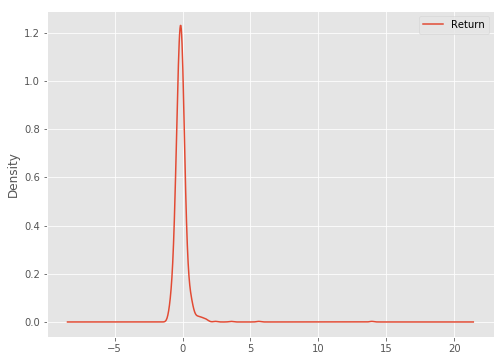

In [88]:
fundRet2[["Return"]].plot(kind='kde', figsize=(8,6));

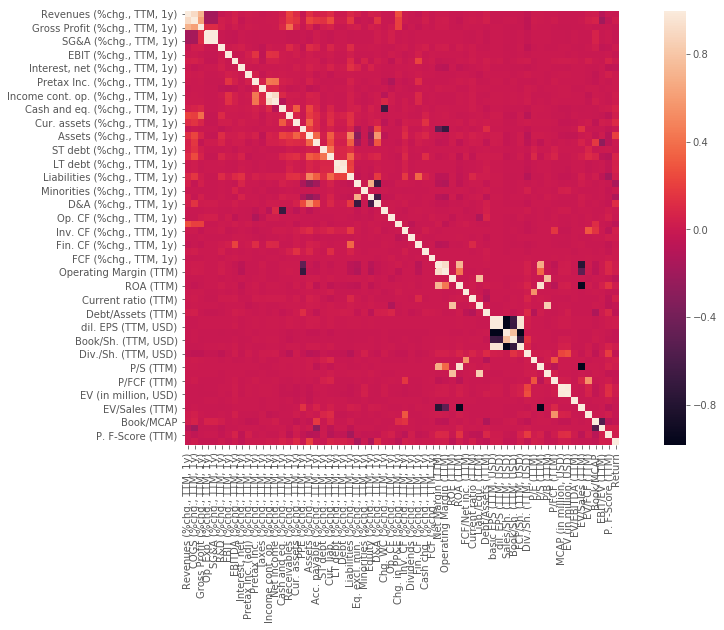

In [86]:
plt.rcParams['figure.figsize']=(16,8)
plt.style.use('ggplot')
cormat = fundRet2.corr()
sns.heatmap(cormat, square=True);

## Predictive Analytics

In [89]:
# Importing the Libraries
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
import scikitplot as skplt
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing, metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

### Stocks Return Distribution

In [90]:
# Checking for Data Distribution of the dependent variable
fundRet2[["Return"]].describe()

,Return
count,1083.000000
mean,-0.088828
std,0.604901
min,-0.999888
25%,-0.332220
50%,-0.138554
75%,0.043283
max,13.929168


### Benchmarking Stock Returns using a Market or Index Return: S&P500

In [91]:
#Loading the market index S&P
index = pd.read_csv('GSPC S&P.csv')

In [92]:
index.shape

(253, 7)

In [93]:
index.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/27/2017,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000
1,12/28/2017,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000
2,12/29/2017,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000
3,1/2/2018,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3367250000
4,1/3/2018,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000


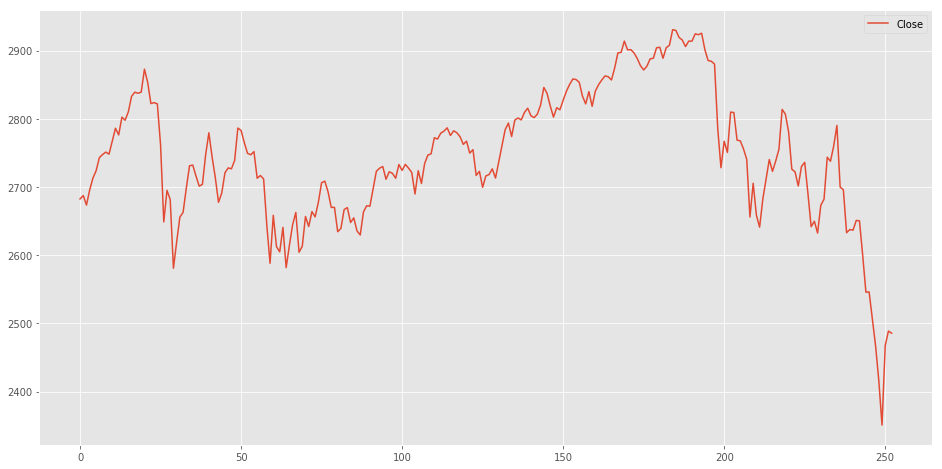

In [94]:
index[["Close"]].plot();

In [95]:
# Index Annual Return using 252-days interval
ixRet = (index[["Close"]].loc[252]/index[["Close"]].loc[0])-1
ixRet

Close   -0.073391
dtype: float64

In [96]:
# S&P Average Return within the period is 0.07339 or 7.3% 
# The average stock return of -8.9% is close to the market average given the fact that the market index
# is made up of a sample of the constituent stocks and the composition of the index does not change frequently
# Negative Performance for the index happened mostly in the last 60 days
# Thus, Annual Return using Daily Compounding will be computed for comparison

In [97]:
#Annual Return compounded daily
dailyRet = index["Close"].pct_change(1).sum()
dailyRet

-0.061762537668957784

In [98]:
#Annual Return compounded yearly
yearlyRet = index["Close"].pct_change(252).sum()
yearlyRet

-0.07339098285007017

In [99]:
# Annual Return compounded daily is slightly higher given the fall in prices largely occured in the last 60 days.

### Return Classification, benchamrked to Index Return

In [100]:
# Stock Returns will be classified and benchmarked to the market return. 
#Stocks with Return:
# <= -0.073 shall be classified as bad stocks, implying that investors are likely going to lose money, thus assigned 1
# > -0.073 shall be classified as good stocks. These are stocks that investors may not lose money, thus assigned 0

In [101]:
# Change the object from fundRet2 to dataset for easy referencing
dataset = fundRet2

In [102]:
#dataset.to_csv('dataset.csv')

In [103]:
dataset.loc[dataset['Return']<=0.073, 'Loss'] = 1
dataset.loc[dataset['Return']>0.073, 'Loss'] = 0

In [104]:
dataset.head()

,Name,Ticker,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)",...,"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM),Return,Loss
0,1 800 FLOWERS COM INC,FLWS,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,...,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5,0.107477,0.0
1,21st Century Fox,FOX,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,-0.0073,...,84236.546740,104151.607800,14.77,3.41,20.51,0.24,0.0620,6,0.401115,0.0
2,3D SYSTEMS CORP,DDD,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,...,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0,0.140251,0.0
3,3M,MMM,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,...,123317.884900,125106.677500,15.41,3.81,24.34,0.09,0.0532,4,-0.190989,1.0
4,8X8 INC /DE/,EGHT,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,12.4883,...,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1,0.263860,0.0


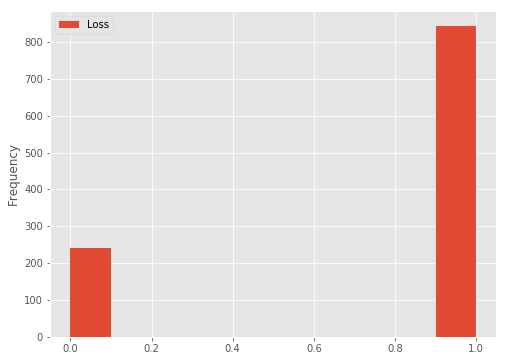

In [105]:
#Checking for the distribution of RetClass
dataset[['Loss']].plot(kind='hist', figsize=(8,6));

In [106]:
# Clearly, this is an imbalanced dataset

In [107]:
dataset[['Loss']].count().sum()

1083

In [108]:
dataset.groupby('Loss')['Loss'].count()/dataset['Loss'].count().sum()

Loss
0.0    0.221607
1.0    0.778393
Name: Loss, dtype: float64

In [109]:
# The distribution of the dependent variable is imbalanced, (Loss category 0 makes up less than a quarter of the entire dataset),
#so we run ML algorithms on both this data and a resampled data later

## Data Preprocessing Part B

### Using An Imbalanced Dataset

In [110]:
dataset.columns.get_loc("P. F-Score (TTM)")

64

In [111]:
#Selecting the Features
X = dataset.iloc[:,2:65]
y = dataset.iloc[:,-1]

In [112]:
X.head()

,"Revenues (%chg., TTM, 1y)","COGS (%chg., TTM, 1y)","Gross Profit (%chg., TTM, 1y)","Op. Exp. (%chg., TTM, 1y)","SG&A (%chg., TTM, 1y)","R&D (%chg., TTM, 1y)","EBIT (%chg., TTM, 1y)","EBITDA (%chg., TTM, 1y)","Interest, net (%chg., TTM, 1y)","Pretax Inc. (adj) (%chg., TTM, 1y)",...,P/B (TTM),P/FCF (TTM),"MCAP (in million, USD)","EV (in million, USD)",EV/EBITDA (TTM),EV/Sales (TTM),EV/FCF (TTM),Book/MCAP,EBIT/EV (TTM),P. F-Score (TTM)
0,-0.0178,0.0072,-0.0501,-0.0294,-0.0337,0.0200,-0.2443,-0.1610,-0.3353,-0.4219,...,2.72,18.52,720.839700,879.482310,12.00,0.72,20.29,0.37,0.0449,5
1,0.0545,0.0861,0.0007,0.0238,0.0164,0.0000,-0.0141,-0.0073,0.0025,-0.0566,...,4.14,17.87,84236.546740,104151.607800,14.77,3.41,20.51,0.24,0.0620,6
2,0.0779,0.0735,0.0828,0.0655,0.0814,0.0220,-0.0525,0.1345,9.1778,-0.0058,...,2.33,-25.20,2045.077054,1313.512819,69.11,1.92,-24.24,0.42,-0.0319,0
3,0.0585,0.0646,0.0524,0.1339,0.1750,-0.0114,-0.0454,-0.0502,2.9634,-0.0812,...,11.22,22.51,123317.884900,125106.677500,15.41,3.81,24.34,0.09,0.0532,4
4,-0.0626,-0.0204,-0.0757,0.1077,0.0876,0.2346,2.5943,12.4883,0.0000,3.6213,...,6.76,-14.88,1816.977159,1532.456973,-42.78,6.02,-14.09,0.14,-0.0359,1


In [113]:
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Loss, dtype: float64

### Splitting the dataset

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((812, 63), (271, 63), (812,), (271,))

### Scaling the features

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the Algorithms

In [117]:
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)

In [118]:
# Dictionary of different classifiers
clfs = {
'LogisticRegression' : LogisticRegression(),
'DecisionTree': DecisionTreeClassifier(),
'KNNClassifier': KNeighborsClassifier(),
'NaiveBayes': GaussianNB(),
'SupportVectorMachines': SVC(kernel="poly"),
'Bagging': BaggingClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'XGBoost': XGBClassifier(),
'StackingClassifier': StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)
}

In [119]:
# Testing all clfs models and generating a report
models_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision_score', 'Recall_score','F1_score', 'AUC'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred),
                     'AUC': metrics.roc_auc_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Accuracy,Precision_score,Recall_score,F1_score,AUC
0,LogisticRegression,0.719557,0.747036,0.940299,0.832599,0.513006
1,DecisionTree,0.693727,0.789216,0.800995,0.795062,0.593355
2,KNNClassifier,0.693727,0.736000,0.915423,0.815965,0.486283
3,NaiveBayes,0.704797,0.768889,0.860697,0.812207,0.558920
4,SupportVectorMachines,0.730627,0.742424,0.975124,0.843011,0.501848
5,Bagging,0.745387,0.800000,0.875622,0.836105,0.623525
6,AdaBoostClassifier,0.771218,0.806167,0.910448,0.855140,0.640938
7,RandomForestClassifier,0.741697,0.788546,0.890547,0.836449,0.602416
8,GradientBoostingClassifier,0.756458,0.784810,0.925373,0.849315,0.598401
9,XGBoost,0.760148,0.783333,0.935323,0.852608,0.596233


**Given the imbalanced nature of the dataset, accuracy scores of 78% is not different from the data distribution.**
- Also, accuracy is not the right metric for an imbalanced dataset such as this, thus, other metrics may need to be considered.
- Precision for the positive class is: among all the predicted positive class, what fraction was correct (TP/(TP+FP)).
- Recall for the positive class is: among all actuall positive class category (ground truth for good stocks), what fraction did the classifiers predict correctly (TP/(TP+FN))

**Observations and Explanations:**
- Recall across all the algorithms are higher than Precision. 
- Performance metrics across all algorithms are lower for class 0 even after tuning the hyperparameters (see below)
- Given there are less datapoints for positives (class 0 or good stocks), it is generally easier for the classifiers to have fewer false negatives (good stocks wrongly classified as bad stocks). 
- Also, given there are more datapoints for the negative class (class 1 or bad stocks), it is not unusual to expect to have more  false positives (bad stocks wrongly classified as good stocks) than false negatives.
- Thus, Precision is expected to be lower across board.

## Tuning the hyperparameters using GridSearch/RandomSearch

**GridSearch is more computationally expensive, hence, RandomSearch was substituted for some of the algorithms**

### Random Forest

In [122]:
rf = RandomForestClassifier()
rf_params = {'n_estimators': np.arange(50,500,50)}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
rf_nested_score = cross_val_score(rf_grid, X, y, cv=5)

In [124]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_rf)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_rf)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_rf)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_rf)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_rf)))
rf_grid.best_params_

Accuracy Score is 0.771218
Precision Score is 0.779116
Recall Score is 0.965174
F1_score is 0.862222
AUC Score is 0.589730


{'n_estimators': 200}

In [125]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(rf_nested_score.mean(), rf_nested_score.std()))

mean of 0.807937 with std. dev. of 0.011218.


In [126]:
print(confusion_matrix(y_test, y_pred_rf))

[[ 15  55]
 [  7 194]]


In [127]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.68      0.21      0.33        70
         1.0       0.78      0.97      0.86       201

   micro avg       0.77      0.77      0.77       271
   macro avg       0.73      0.59      0.59       271
weighted avg       0.75      0.77      0.72       271



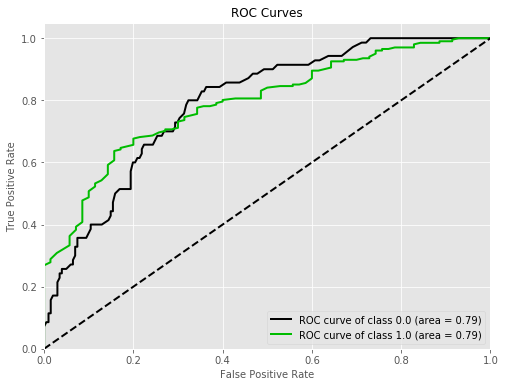

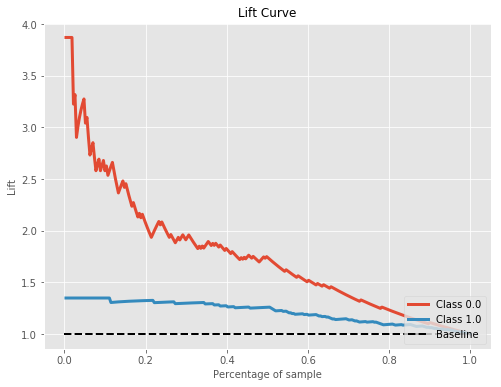

In [128]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False, figsize=(8,6))

rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize=(8,6))

plt.show()

### Support Vector Machine (SVM)

In [135]:
svm = SVC('linear')
svm_params = {'C': [0.1,100,1000], 'gamma':[0.001,0.01,10]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
#svm_grid = RandomizedSearchCV(svm, param_distributions=svm_params, refit=True, cv=3)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)
svm_nested_score = cross_val_score(svm_grid, X, y, cv=5)

In [136]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_svm)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_svm)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_svm)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_svm)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_svm)))
svm_grid.best_params_

Accuracy Score is 0.741697
Precision Score is 0.741697
Recall Score is 1.000000
F1_score is 0.851695
AUC Score is 0.500000


{'C': 0.1, 'gamma': 0.001}

In [137]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(svm_nested_score.mean(), svm_nested_score.std()))

mean of 0.778392 with std. dev. of 0.000502.


In [138]:
print(confusion_matrix(y_test, y_pred_svm))

[[  0  70]
 [  0 201]]


In [139]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        70
         1.0       0.74      1.00      0.85       201

   micro avg       0.74      0.74      0.74       271
   macro avg       0.37      0.50      0.43       271
weighted avg       0.55      0.74      0.63       271



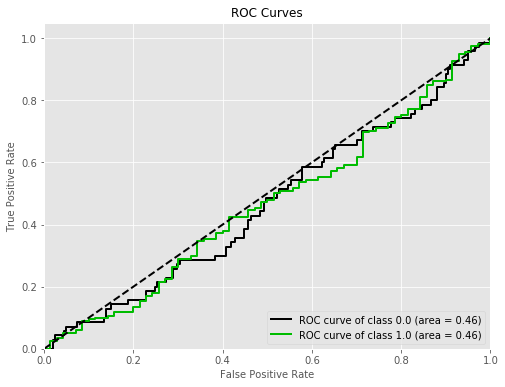

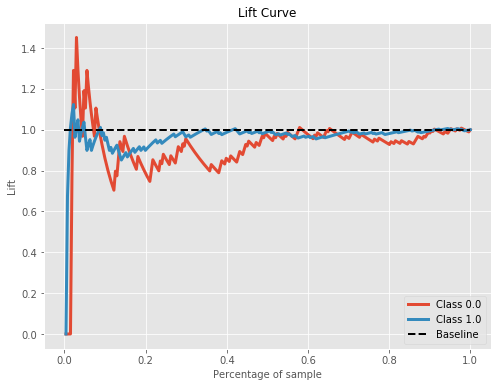

In [140]:
svm = SVC(kernel='linear', gamma=0.001, C=0.1, probability=True)
svm = svm.fit(X_train, y_train)
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

svm = SVC(kernel='linear', gamma=0.001, C=0.1, probability=True)
svm = svm.fit(X_train, y_train)
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Logistic Regression

In [129]:
lr = LogisticRegression()
lr_params = {'C': [0.1, 10.0, 100, 1000]}
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.predict(X_test)
lr_nested_score = cross_val_score(lr_grid, X, y, cv=5)

In [130]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_lr)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_lr)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_lr)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_lr)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_lr)))
lr_grid.best_params_

Accuracy Score is 0.726937
Precision Score is 0.749020
Recall Score is 0.950249
F1_score is 0.837719
AUC Score is 0.517982


{'C': 0.1}

In [131]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(lr_nested_score.mean(), lr_nested_score.std()))

mean of 0.757122 with std. dev. of 0.017653.


In [132]:
print(confusion_matrix(y_test, y_pred_lr))

[[  6  64]
 [ 10 191]]


In [133]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.38      0.09      0.14        70
         1.0       0.75      0.95      0.84       201

   micro avg       0.73      0.73      0.73       271
   macro avg       0.56      0.52      0.49       271
weighted avg       0.65      0.73      0.66       271



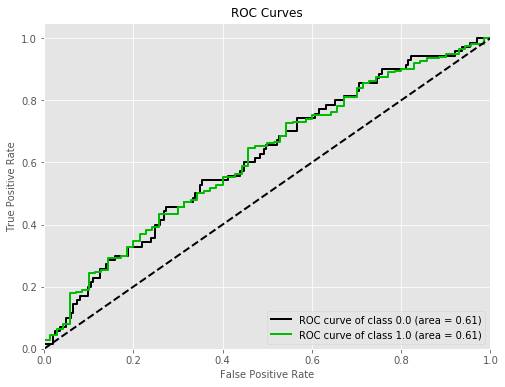

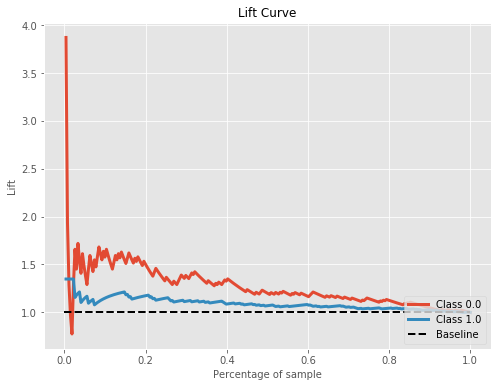

In [134]:
lr = LogisticRegression(C=0.1)
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

lr = LogisticRegression(C=0.1)
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Decision Tree

In [141]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth': np.arange(3,12,1),'min_samples_split':np.arange(2,10,1),'min_samples_leaf':np.arange(1,10,1)}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)
dt_nested_score = cross_val_score(dt_grid, X, y, cv=5)

In [142]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_dt)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_dt)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_dt)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_dt)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_dt)))
dt_grid.best_params_

Accuracy Score is 0.723247
Precision Score is 0.769231
Recall Score is 0.895522
F1_score is 0.827586
AUC Score is 0.562047


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 4}

In [143]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(dt_nested_score.mean(), dt_nested_score.std()))

mean of 0.786683 with std. dev. of 0.020502.


In [144]:
print(confusion_matrix(y_test, y_pred_dt))

[[ 16  54]
 [ 21 180]]


In [145]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.43      0.23      0.30        70
         1.0       0.77      0.90      0.83       201

   micro avg       0.72      0.72      0.72       271
   macro avg       0.60      0.56      0.56       271
weighted avg       0.68      0.72      0.69       271



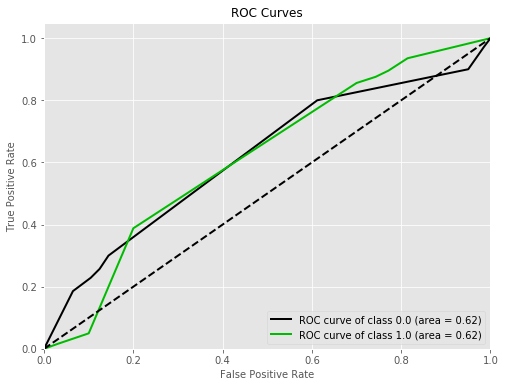

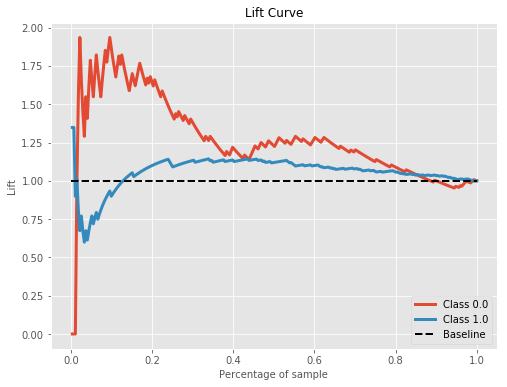

In [146]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=2)
dt = dt.fit(X_train, y_train)
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=2)
dt = dt.fit(X_train, y_train)
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### K-Nearest Neigbor (KNN)

In [147]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(2,15,1), 'leaf_size':np.arange(3,15,1)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
y_pred_knn = knn_grid.predict(X_test)
knn_nested_score = cross_val_score(knn_grid, X, y, cv=5)

In [148]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_knn)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_knn)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_knn)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_knn)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_knn)))
knn_grid.best_params_

Accuracy Score is 0.741697
Precision Score is 0.749049
Recall Score is 0.980100
F1_score is 0.849138
AUC Score is 0.518621


{'leaf_size': 3, 'n_neighbors': 9}

In [149]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(knn_nested_score.mean(), knn_nested_score.std()))

mean of 0.773775 with std. dev. of 0.006561.


In [150]:
print(confusion_matrix(y_test, y_pred_knn))

[[  4  66]
 [  4 197]]


In [151]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.50      0.06      0.10        70
         1.0       0.75      0.98      0.85       201

   micro avg       0.74      0.74      0.74       271
   macro avg       0.62      0.52      0.48       271
weighted avg       0.68      0.74      0.66       271



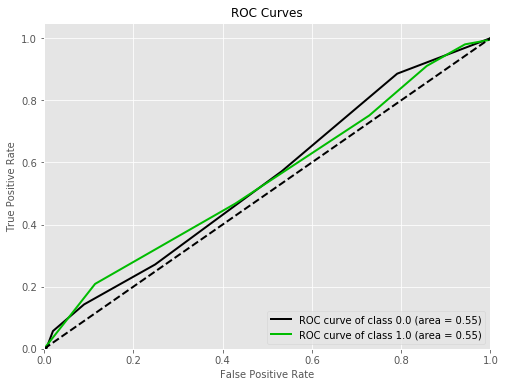

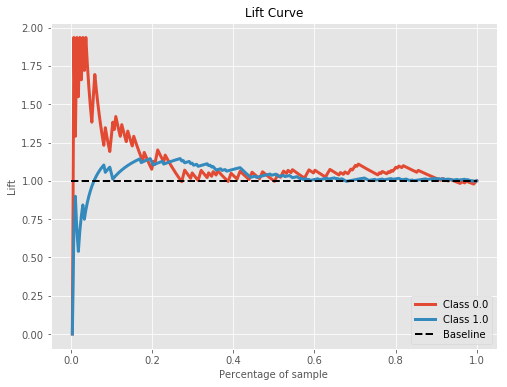

In [152]:
knn = KNeighborsClassifier(n_neighbors=9, leaf_size=3)
knn = knn.fit(X_train, y_train)
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

knn = KNeighborsClassifier(n_neighbors=9, leaf_size=3)
knn = knn.fit(X_train, y_train)
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Naive Bayes

In [193]:
nb = GaussianNB()
nb_params = {'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07]}
nb_grid = GridSearchCV(nb, nb_params, cv=5)
nb_grid.fit(X_train, y_train)
y_pred_nb = nb_grid.predict(X_test)
nb_nested_score = cross_val_score(nb_grid, X, y, cv=5)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will

In [194]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_nb)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_nb)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_nb)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_nb)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_nb)))
nb_grid.best_params_

Accuracy Score is 0.704797
Precision Score is 0.768889
Recall Score is 0.860697
F1_score is 0.812207
AUC Score is 0.558920


{'var_smoothing': 1e-12}

In [195]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(nb_nested_score.mean(), nb_nested_score.std()))

mean of 0.543770 with std. dev. of 0.203500.


In [196]:
print(confusion_matrix(y_test, y_pred_nb))

[[ 18  52]
 [ 28 173]]


In [197]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.39      0.26      0.31        70
         1.0       0.77      0.86      0.81       201

   micro avg       0.70      0.70      0.70       271
   macro avg       0.58      0.56      0.56       271
weighted avg       0.67      0.70      0.68       271



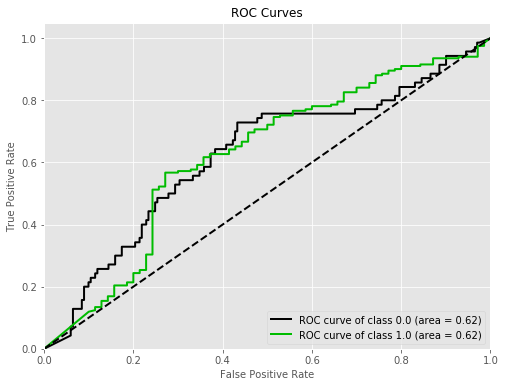

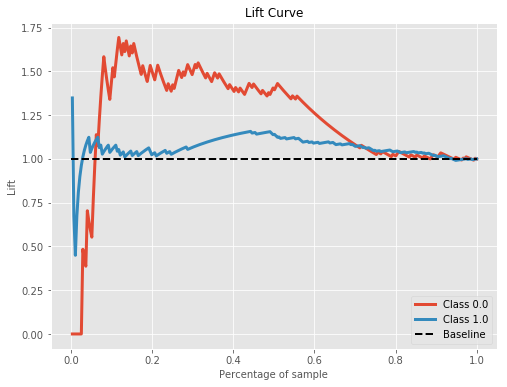

In [198]:
nb = GaussianNB(var_smoothing=1e-12)
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

nb = GaussianNB(var_smoothing=1e-12)
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Ada Boost

In [159]:
ab = AdaBoostClassifier()
ab_params = {'n_estimators': np.arange(50,500,50),'learning_rate':np.arange(0.4,2.0,0.2)}
ab_grid = GridSearchCV(ab, ab_params, cv=3)
ab_grid.fit(X_train, y_train)
y_pred_ab = ab_grid.predict(X_test)
ab_nested_score = cross_val_score(ab_grid, X, y, cv=5)

In [160]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_ab)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_ab)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_ab)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_ab)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_ab)))
ab_grid.best_params_

Accuracy Score is 0.756458
Precision Score is 0.794760
Recall Score is 0.905473
F1_score is 0.846512
AUC Score is 0.617022


{'learning_rate': 0.6000000000000001, 'n_estimators': 50}

In [161]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(ab_nested_score.mean(), ab_nested_score.std()))

mean of 0.804250 with std. dev. of 0.010306.


In [162]:
print(confusion_matrix(y_test, y_pred_ab))

[[ 23  47]
 [ 19 182]]


In [163]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

         0.0       0.55      0.33      0.41        70
         1.0       0.79      0.91      0.85       201

   micro avg       0.76      0.76      0.76       271
   macro avg       0.67      0.62      0.63       271
weighted avg       0.73      0.76      0.73       271



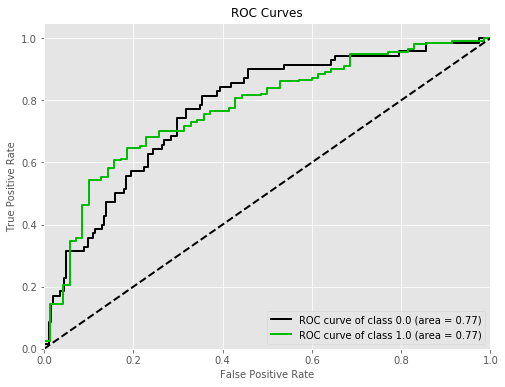

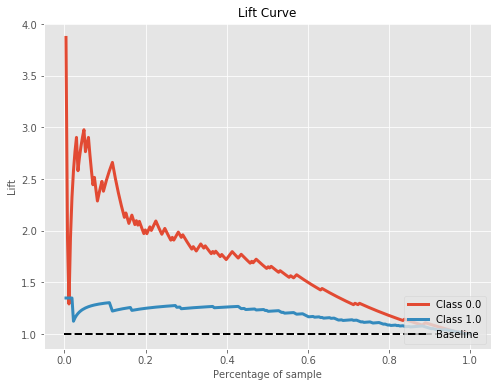

In [164]:
ab = AdaBoostClassifier(learning_rate=0.6, n_estimators=50)
ab = ab.fit(X_train, y_train)
y_probas = ab.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

ab = AdaBoostClassifier(learning_rate=0.6, n_estimators=50)
ab = ab.fit(X_train, y_train)
y_probas = ab.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Gradient Boosting

In [165]:
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': np.arange(100,500,50),'learning_rate' : np.arange(0.01,0.1,0.02), 'max_depth':np.arange(3,11,2)}
gb_grid = GridSearchCV(gb, gb_params, cv=5)
#gb_grid = RandomizedSearchCV(gb, param_distributions=gb_params, refit=True)
gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.predict(X_test)
gb_nested_score = cross_val_score(gb_grid, X, y, cv=5)

In [166]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_gb)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_gb)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_gb)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_gb)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_gb)))
gb_grid.best_params_

Accuracy Score is 0.778598
Precision Score is 0.800000
Recall Score is 0.935323
F1_score is 0.862385
AUC Score is 0.631947


{'learning_rate': 0.06999999999999999, 'max_depth': 9, 'n_estimators': 100}

In [167]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(gb_nested_score.mean(), gb_nested_score.std()))

mean of 0.806998 with std. dev. of 0.019234.


In [168]:
print(confusion_matrix(y_test, y_pred_gb))

[[ 23  47]
 [ 13 188]]


In [169]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.64      0.33      0.43        70
         1.0       0.80      0.94      0.86       201

   micro avg       0.78      0.78      0.78       271
   macro avg       0.72      0.63      0.65       271
weighted avg       0.76      0.78      0.75       271



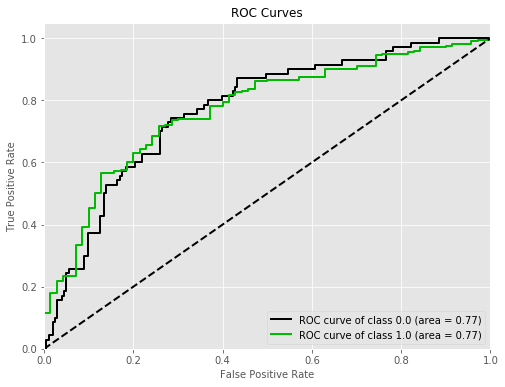

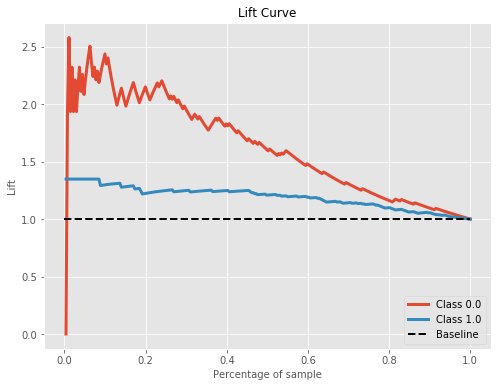

In [170]:
gb = GradientBoostingClassifier(learning_rate=0.03, n_estimators=100, max_depth= 3)
gb = gb.fit(X_train, y_train)
y_probas = gb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

gb = GradientBoostingClassifier(learning_rate=0.03, n_estimators=100, max_depth= 3)
gb = gb.fit(X_train, y_train)
y_probas = gb.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Bagging

In [171]:
bg = BaggingClassifier()
bg_params = {'n_estimators': np.arange(4,20,2)}
bg_grid = GridSearchCV(bg, bg_params, cv=5)
bg_grid.fit(X_train, y_train)
y_pred_bg = bg_grid.predict(X_test)
bg_nested_score = cross_val_score(bg_grid, X, y, cv=5)

In [172]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_bg)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_bg)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_bg)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_bg)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_bg)))
bg_grid.best_params_

Accuracy Score is 0.741697
Precision Score is 0.793722
Recall Score is 0.880597
F1_score is 0.834906
AUC Score is 0.611727


{'n_estimators': 16}

In [173]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(bg_nested_score.mean(), bg_nested_score.std()))

mean of 0.789469 with std. dev. of 0.021787.


In [174]:
print(confusion_matrix(y_test, y_pred_bg))

[[ 24  46]
 [ 24 177]]


In [175]:
print(classification_report(y_test, y_pred_bg))

              precision    recall  f1-score   support

         0.0       0.50      0.34      0.41        70
         1.0       0.79      0.88      0.83       201

   micro avg       0.74      0.74      0.74       271
   macro avg       0.65      0.61      0.62       271
weighted avg       0.72      0.74      0.72       271



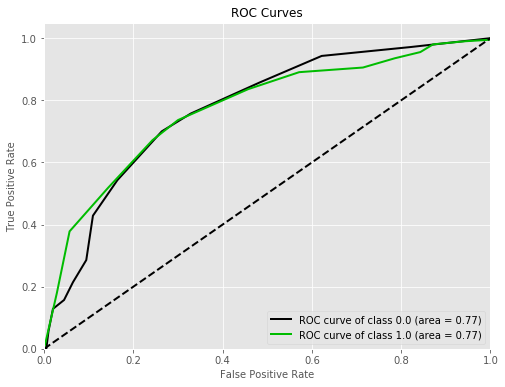

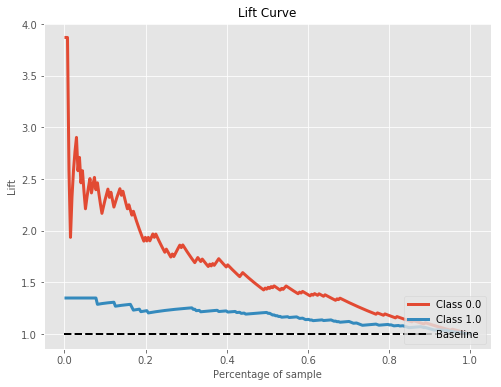

In [176]:
bg = BaggingClassifier(n_estimators=14)
bg = bg.fit(X_train, y_train)
y_probas = bg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

bg = BaggingClassifier(n_estimators=14)
bg = bg.fit(X_train, y_train)
y_probas = bg.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Stacking Classifier

In [177]:
clf1 = AdaBoostClassifier(learning_rate=0.6, n_estimators=50)
clf2 = GradientBoostingClassifier(learning_rate=0.03, n_estimators=100, max_depth= 3)
clf3 = BaggingClassifier(n_estimators=14)
rf = RandomForestClassifier(n_estimators=300)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=rf, use_features_in_secondary=True)
sclf.fit(X_train, y_train)
y_pred_sclf = bg_grid.predict(X_test)

In [178]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_sclf)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_sclf)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_sclf)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_sclf)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_sclf)))

Accuracy Score is 0.741697
Precision Score is 0.793722
Recall Score is 0.880597
F1_score is 0.834906
AUC Score is 0.611727


In [179]:
print(confusion_matrix(y_test, y_pred_sclf))

[[ 24  46]
 [ 24 177]]


In [180]:
print(classification_report(y_test, y_pred_sclf))

              precision    recall  f1-score   support

         0.0       0.50      0.34      0.41        70
         1.0       0.79      0.88      0.83       201

   micro avg       0.74      0.74      0.74       271
   macro avg       0.65      0.61      0.62       271
weighted avg       0.72      0.74      0.72       271



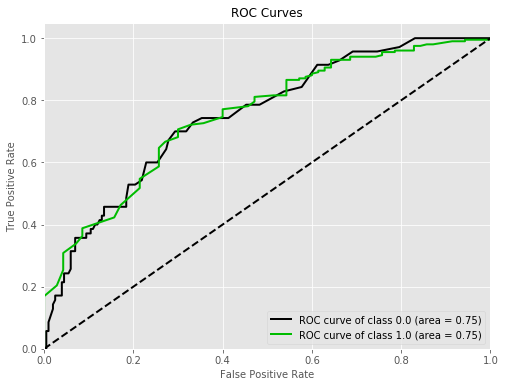

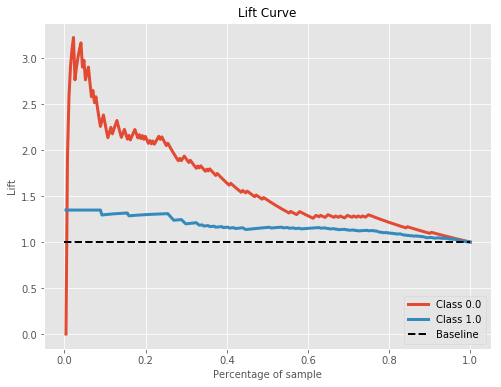

In [181]:
clf1 = AdaBoostClassifier(learning_rate=0.6, n_estimators=50)
clf2 = GradientBoostingClassifier(learning_rate=0.03, n_estimators=100, max_depth= 3)
clf3 = BaggingClassifier(n_estimators=14)
rf = RandomForestClassifier(n_estimators=300)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=rf, use_features_in_secondary=True)
sclf = sclf.fit(X_train, y_train)
y_probas = sclf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

clf1 = AdaBoostClassifier(learning_rate=0.6, n_estimators=50)
clf2 = GradientBoostingClassifier(learning_rate=0.03, n_estimators=100, max_depth= 3)
clf3 = BaggingClassifier(n_estimators=14)
rf = RandomForestClassifier(n_estimators=300)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=rf, use_features_in_secondary=True)
sclf = sclf.fit(X_train, y_train)
y_probas = sclf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

## Model Performance after Tuning the Hyperparameters

In [182]:
clf1 = KNeighborsClassifier(leaf_size=3, n_neighbors=9)
clf2 = RandomForestClassifier(random_state=1, n_estimators=300)
clf3 = GaussianNB(var_smoothing=1e-12)
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)

In [183]:
# Dictionary of different classifiers
clfs = {
'LogisticRegression' : LogisticRegression(C=0.1),
'DecisionTree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=2),
'KNNClassifier': KNeighborsClassifier(leaf_size=3, n_neighbors=9),
'NaiveBayes': GaussianNB(var_smoothing=1e-12),
'SupportVectorMachines': SVC(kernel="linear", C=0.1, gamma=0.001),
'Bagging': BaggingClassifier(n_estimators=14),
'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.6, n_estimators=50),
'RandomForestClassifier': RandomForestClassifier(random_state=1, n_estimators=300),
'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.03, max_depth=3, n_estimators=100),
'XGBoost': XGBClassifier(),
'StackingClassifier': StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)
}

In [184]:
# Testing all clfs models and generating a report
models_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision_score', 'Recall_score','F1_score', 'AUC'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred),
                     'AUC': metrics.roc_auc_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Accuracy,Precision_score,Recall_score,F1_score,AUC
0,LogisticRegression,0.726937,0.749020,0.950249,0.837719,0.517982
1,DecisionTree,0.723247,0.769231,0.895522,0.827586,0.562047
2,KNNClassifier,0.741697,0.749049,0.980100,0.849138,0.518621
3,NaiveBayes,0.704797,0.768889,0.860697,0.812207,0.558920
4,SupportVectorMachines,0.738007,0.742537,0.990050,0.848614,0.502168
5,Bagging,0.749077,0.798206,0.885572,0.839623,0.621357
6,AdaBoostClassifier,0.756458,0.794760,0.905473,0.846512,0.617022
7,RandomForestClassifier,0.774908,0.780000,0.970149,0.864745,0.592217
8,GradientBoostingClassifier,0.767528,0.780488,0.955224,0.859060,0.591898
9,XGBoost,0.760148,0.783333,0.935323,0.852608,0.596233


In [185]:
# Even after tuning the hyperparameters, not much improvement is observed.

## Part 2 Using a resampled dataset to solve the problem of imbalanced dataset with significant performance improvements across the algorithms

** Part II of this project utilizes a couple of techniques to solve the problem of imbalanced dataset, among which are:**
- Ensemble Methods (also adopted here)
- Random oversampling of the undersampled class
- Hyperparameter tuning using GridSearch
- More visualizations such as the lift and roc curves
- Artificial Neural Network
- Feauture Selection and Importance

Link to Part II can be found here [Part II](https://github.com/adiari1/ML-Projects/blob/master/Stocks%20Return%20Prediction%20Part%20II%20-%20Classification.ipynb)

## Disclaimer

The content of this publication is intended for information and education purposes only. It is very important to do your own 
analysis before making any investment decision based on your own personal circumstances. You should take independent
financial advice from a professional in connection with, or independently research and verify, any information you find in
this publication and wish to rely upon, whether for the purpose of making investment decision or otherwise.